# BP算法

反向传播算法是目前用来训练人工神经网络（Artificial Neural Network，ANN）的最常用且最有效的算法，其主要思想是：将训练集数据输入到输入层，经过隐藏层，最后达到输出层并输出结果，这是ANN的前向传播过程；由于ANN的输出结果与实际结果有误差，则先计算估计值与实际值之间的误差，并将该误差从输出层向隐藏层反向传播，直至传播到输入层；在反向传播的过程中，根据误差调整各种参数的值；不断迭代上述过程，直至收敛。

# K均值算法

K-均值聚类将样本集合划分为k个子集，构成k个类，将n个样本分别划分到每个类中，每个样本到其所属类的**中心**的距离相比于到其他类的**距离**是最小的，**同时每个样本只能属于一个类，所以k均值是硬分类。**

## K-means算法流程
1：随机选择K个点作为初始质心。  
2：将每个点指派到最近的质心，形成K个簇。   
3：对于上一部聚类的结果,进行平均计算,得出该簇的新的聚类中心。  
4：重复上述两步/直到迭代结束：质心不发生变化，质心变化在阈值之内。  

## 距离公式
闵可夫斯基距离（Minkowski distance) 简称为闵氏距离    
设n维空间中有两点坐标x, y，p为常数，闵式距离定义为
$d(x,y)=(\sum_i|x_i-y_i|^p) ^\frac{1}{p}$  
一般使用$p$取1或者2时的闵氏距离。   

$p$=1时为曼哈顿距离。   
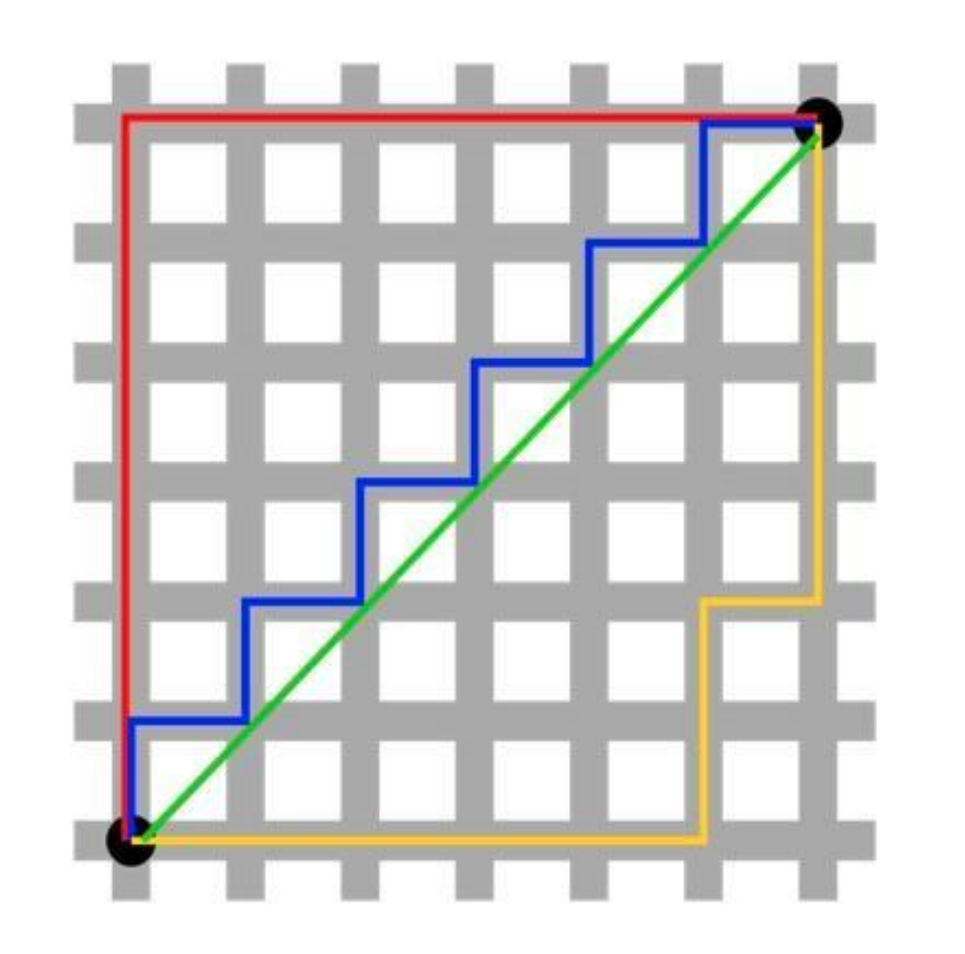
$p$=2时为欧式距离。
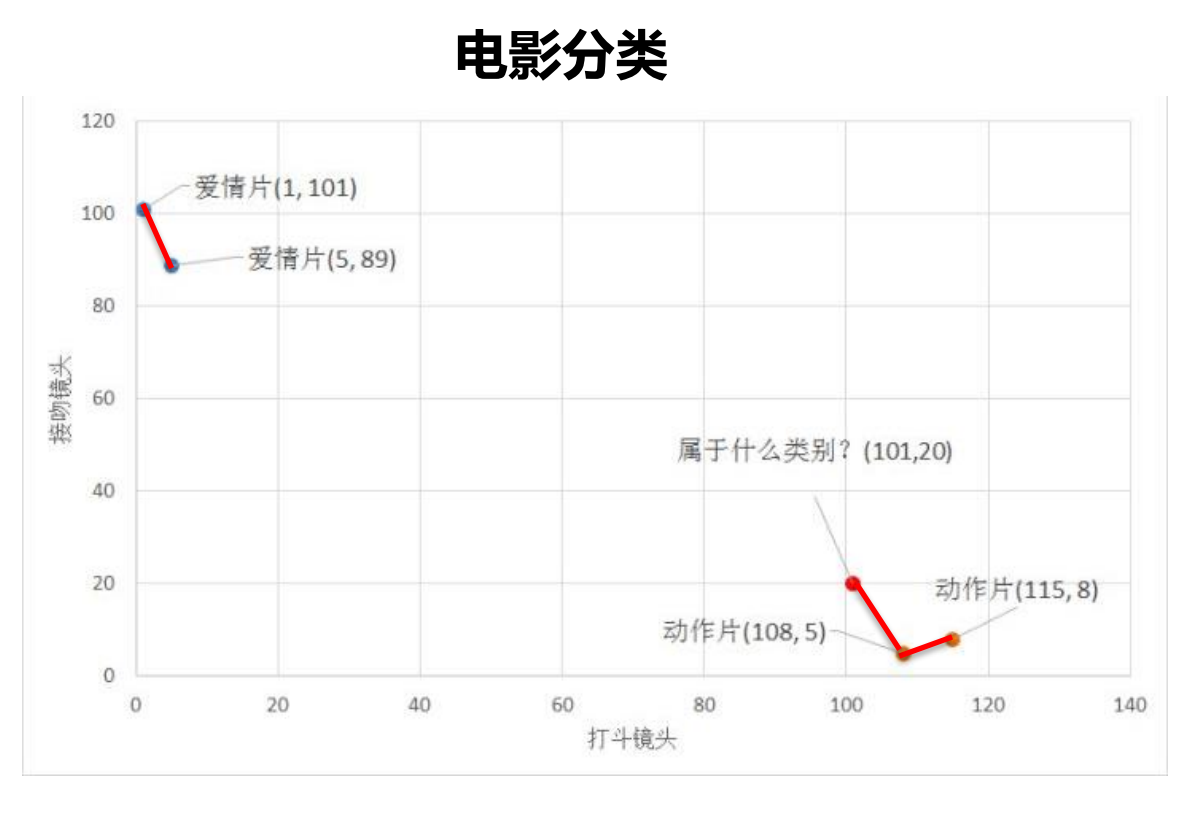
当$p$取无穷时的极限情况下，即是切比雪夫距离。   
二个点之间的距离定义是其各坐标数值差绝对值的最大值。

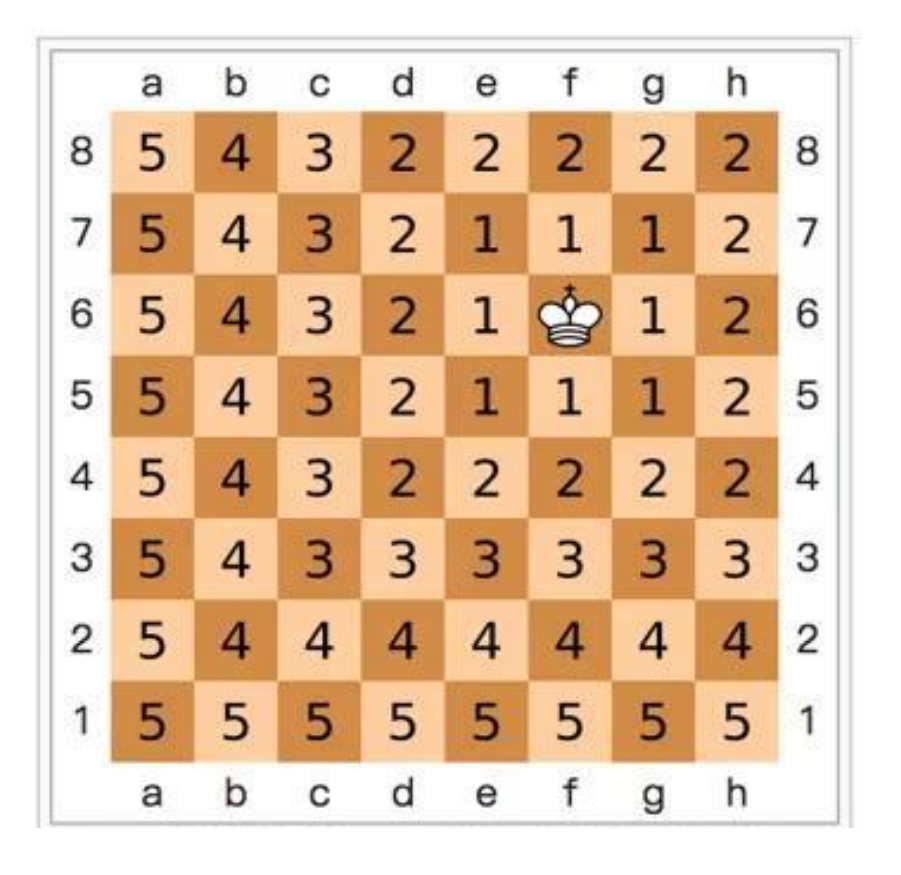

## K-means的应用
市场细分，客户识别、文档聚类，图像压缩、识别癌症基因、

# K-means代码

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from IPython import display
import time

class KMeans(object):
    def __init__(self, data,epochs=10,GetDistance=None):  # data: 要分类的数据，二维数组，每一行是一个样本，列数为样本特征数
        self.data = data  # 数据集
        self.epochs = epochs  # 迭代次数
        if GetDistance== None:
            self.GetDistance =  lambda a: np.sum(np.square(a))
        else:
            self.GetDistance = GetDistance
        
    def cal_distance(self,data):
        '''
        计算单个样本与每个中心的距离，然后将其归于最近的一类
        返回样本的类别
        '''
        alldistance = np.zeros((len(data),self.k))
        for i in range(len(data)):
            """遍历每个样本"""
            for j in range(len(self.center)):
                alldistance[i,j] =  self.GetDistance(data[i]-self.center[j])

        return np.argmin(alldistance,axis=1)

    def clustering(self, k,PlotChoose):     # k: 要聚类的数量
        """聚类函数"""
        self.k = k
        np.random.seed(100)
        choices = np.random.randint(0, len(self.data), size=k,)  # 随机选取k个数据作为质心
        self.center = np.copy(self.data[choices])     # 从data中随机选取k行作为随机中心
        self.pre_center = self.center.copy()
        epoch = 0
        while epoch < self.epochs:
            self.calssers =self.cal_distance(self.data) # 得到分类数据
            if  epoch %5 == 0 and PlotChoose:
                display.clear_output(wait=True)
                plt.figure()
                plt.title(f"epoch:{epoch}")
                plt.scatter(self.data[:,0],self.data[:,1],c=self.calssers,s=3,alpha=0.3)
                plt.scatter(self.center[:,0],self.center[:,1],marker='+',c=range(self.k),s=200) 
                plt.pause(0.1)
                #plt.savefig("res.jpg")
                #plt.draw()#注意此函数需要调用
                time.sleep(1)
            self.update() # 更新簇点
            epoch += 1
            if (self.pre_center == self.center.copy).all():
                break

    def update(self,):
        """更新质心"""
        for i in np.arange(self.k):
            classer_index = np.argwhere(self.calssers==i)
            self.center[i,:] = np.mean(self.data[classer_index[:,0],:],axis=0) # 得到新的中心
        self.pre_center = self.center.copy()




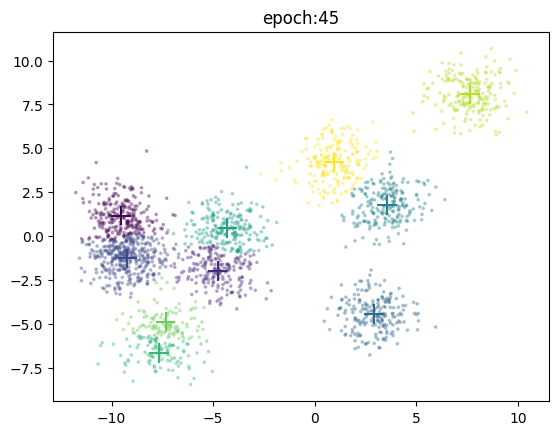

In [59]:
from sklearn import cluster, datasets
n_samples = 2000
testdata = datasets.make_blobs(n_samples=n_samples, random_state=3,centers=10)
XData = testdata[0]
GetDistance = lambda a : np.sum(np.abs(a))  # 曼哈顿距离
#XData = np.random.random((200,2))
km = KMeans(XData,50,GetDistance)    # 定义一个聚类器
km.clustering(10,True) # 运行聚类

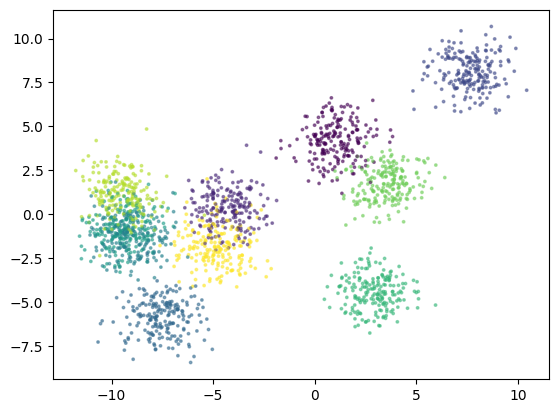

In [61]:
plt.scatter(XData[:,0],XData[:,1],c=testdata[1],s=3,alpha=0.3)  # 散点图
plt.show()

# K值的选择

通过”肘部法则”寻找K。   
每个类的畸变程度等于每个变量点到其类别中心的位置距离平方和（类内部的成员彼此越紧凑则类的畸变程度越小，越分散越大）
$SSE=\sum_{i=1}^{k}\sum_{x\in C_i}|x-m_i|_2^2  (m_i为第i个簇的质心)$
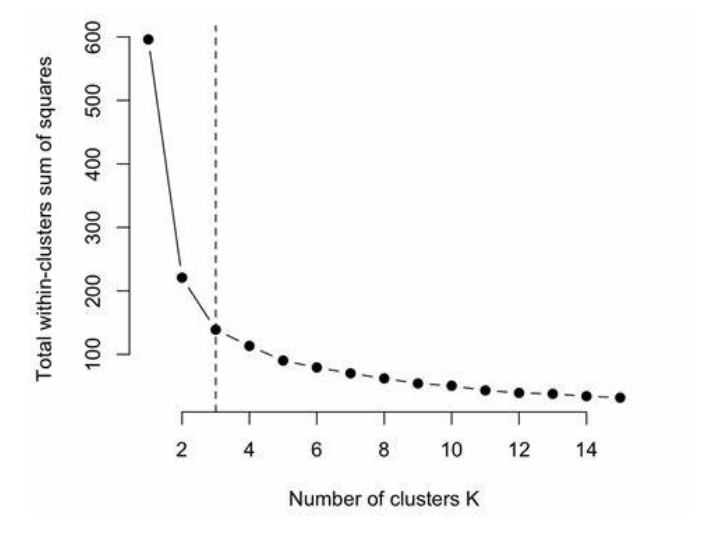

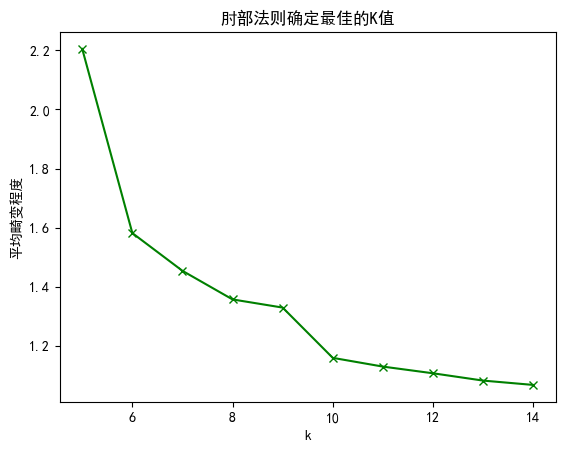

In [62]:
from scipy.spatial.distance import cdist
K=range(5,15)
sse_result=[]
for k in K:
    km.clustering(k,False) # 运行聚类
    sse_result.append(sum(np.min(cdist(XData,km.center,'euclidean'),axis=1))/XData.shape[0])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.plot(K,sse_result,'gx-')
plt.xlabel('k')
plt.ylabel(u'平均畸变程度')
plt.title(u'肘部法则确定最佳的K值')
plt.show()

轮廓系数查找K

$s(i) = \frac{b(i)-a(i)}{max\{a(i),b(i)\}}$  
$a(i)是样本i到同簇其他样本的平均距离,称为簇内不相似度$  
$b(i)是样本i到最近的簇C_j的所有样本的平均距离，称为簇间不相似度$

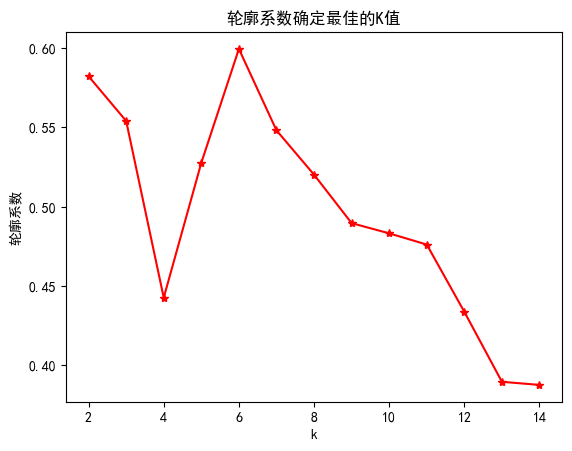

In [63]:
from sklearn.metrics import silhouette_score

K=range(2,15)
score=[]
for k in K:
    km.clustering(k,False) # 运行聚类
    score.append(silhouette_score(XData,km.calssers,metric='euclidean'))
plt.plot(K,score,'r*-')
plt.xlabel('k')
plt.ylabel(u'轮廓系数')
plt.title(u'轮廓系数确定最佳的K值')
plt.show()

# K-means压缩图片

In [66]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
from sklearn.cluster import KMeans
import numpy as np
import cv2
from tensorbay import GAS
from tensorbay.dataset import Segment
from PIL import Image


# Authorize a GAS client.
gas = GAS('Accesskey-2e96f1bcbe77a14b7fccfab458728754')
# Get a dataset client.
dataset_client = gas.get_dataset("DogsVsCats-1")

# List dataset segments.
segments = dataset_client.list_segment_names()

# Get a segment by name
segment = Segment("train", dataset_client)

图片长度 (300, 280)


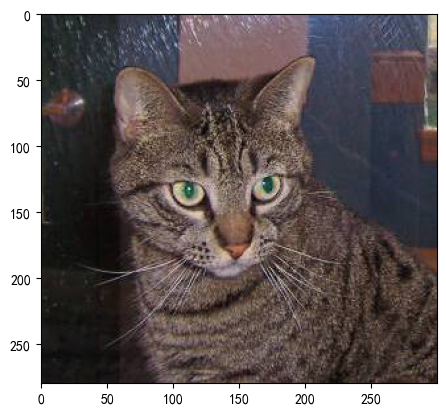

In [67]:
data = segment[1]
with data.open() as fp:
    image = Image.open(fp)
    w,h = image.size
    print("图片长度",image.size)
    plt.imshow(image)
    plt.show()

In [68]:
pixel = np.array(image)
pixel = pixel.reshape((w*h , 3))
 
kmeans = KMeans(n_clusters=32, random_state=0).fit(pixel)
 
newPixel = []
for i in kmeans.labels_:
    newPixel.append(list(kmeans.cluster_centers_[i,:]))

In [69]:
# 聚类结果
kmeans.cluster_centers_

array([[155.06816678, 136.74056916, 129.50297816],
       [ 40.13027917,  45.04724409,  47.69291339],
       [ 95.36571139,  75.7879787 ,  69.78290642],
       [ 51.61085973,  56.2182001 ,  68.74208145],
       [120.02916243, 102.64971177,  98.12851814],
       [ 23.34616995,  20.95646714,  19.06006697],
       [204.3285968 , 188.01598579, 176.3339254 ],
       [ 78.29353349,  61.8147806 ,  57.25681293],
       [ 78.23071672,  86.35358362, 112.32559727],
       [ 62.37736885,  47.68607525,  43.41993958],
       [183.15981735, 167.00684932, 160.08561644],
       [ 53.93198829,  39.87178653,  35.25447445],
       [110.21003717,  93.52354399,  88.84107807],
       [133.39075342, 111.13219178, 113.41986301],
       [ 43.18894272,  49.15502992,  60.82046167],
       [ 93.94621168,  80.89242337,  80.69230769],
       [ 99.00998004,  63.29141717,  54.53093812],
       [ 34.44420035,  36.47891037,  35.78119508],
       [ 95.30855019, 104.01115242, 131.37546468],
       [ 68.55073106,  74.40629

In [70]:
# 显示压缩后的图片
newPixel = np.array(newPixel)
newPixelInt = newPixel.astype(int)
newImage = newPixelInt.reshape((h,w,3))
 
img = np.array(newImage[:,:,::-1], np.uint8)
cv2.imwrite("LowPixels.jpg",img)
cv2.imshow("123", img)
cv2.waitKey(0)

-1

In [71]:
# 使用高斯滤波处理压缩后的图像
import cv2

out=cv2.GaussianBlur(img,(7,7),1.5)

cv2.imwrite('out.jpg',out)

cv2.imshow("123", out)
cv2.waitKey(0)

-1

 # DBSCAN算法

In [72]:
from sklearn import datasets  
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
# iris=datasets.load_iris()
# X=iris.data[:,2:4]#z只取后两个维度
X1, y1=datasets.make_circles(n_samples=5000, factor=.6,
                                      noise=.05)
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[1.2,1.2]], cluster_std=[[.1]],
               random_state=9)

X = np.concatenate((X1, X2))



In [75]:
km = KMeans(X,50,GetDistance)
km.clustering(3)

TypeError: clustering() missing 1 required positional argument: 'PlotChoose'

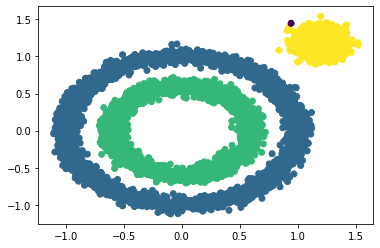

In [20]:
estimator =DBSCAN(eps = 0.1, min_samples = 10)#构造聚类器,一个参数是半径，一个是密度
estimator.fit(X)
label_pred = estimator.labels_ #获取聚类标签
#绘制k-means结果

plt.scatter(X[:, 0], X[:, 1], c = label_pred, marker='o', label='label0')  

plt.show()  

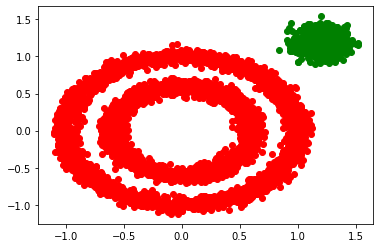

In [21]:
plt.scatter(X1[:, 0], X1[:, 1], c = 'red', marker='o', label='label0')  
plt.scatter(X2[:, 0], X2[:, 1], c = 'green', marker='o', label='label0')  


In [ ]:
# DBSCAN演示网站
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/